# Eigen Face

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from sklearn.decomposition import PCA 

import pickle

In [2]:
# Importando o arquivo de data transformado
data = pickle.load(open('./data/data_images_transformed.pickle', mode='rb'))

In [3]:
data.head()

,pixel_pixel_0,pixel_pixel_1,pixel_pixel_2,pixel_pixel_3,pixel_pixel_4,pixel_pixel_5,pixel_pixel_6,pixel_pixel_7,pixel_pixel_8,pixel_pixel_9,...,pixel_pixel_9991,pixel_pixel_9992,pixel_pixel_9993,pixel_pixel_9994,pixel_pixel_9995,pixel_pixel_9996,pixel_pixel_9997,pixel_pixel_9998,pixel_pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.917647,0.925490,0.921569,0.945098,0.776471,0.729412,0.447059,0.062745,0.176471,0.137255,...,0.070588,0.070588,0.066667,0.082353,0.113725,0.090196,0.121569,0.156863,0.149020,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


## Eigen Face Image

In [4]:
X = data.drop('gender',axis=1).values

In [5]:
mean_face = X.mean(axis=0) 
mean_face.shape

(10000,)

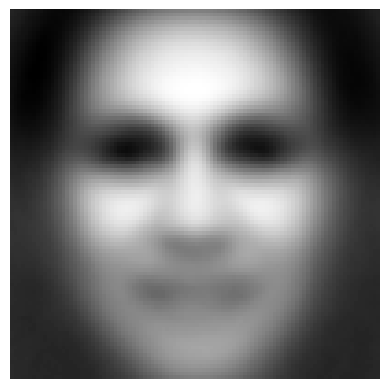

In [6]:
# Visualizando a média de todas as imagens
plt.imshow(mean_face.reshape((100,100)), cmap='gray')
plt.axis('off')
plt.show()

In [7]:
# Subtração de Data e Mean Face
X_transformed = X - mean_face

## PCA

In [12]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(X_transformed)

PCA(whiten=True)

In [13]:
# Verificando os principais componentes
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1, len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.251970,0.251970,1
1,0.113800,0.365770,2
2,0.105841,0.471610,3
3,0.052277,0.523887,4
4,0.033000,0.556888,5


In [14]:
exp_var_df.set_index('principal_components',inplace=True)

<Axes: xlabel='principal_components'>

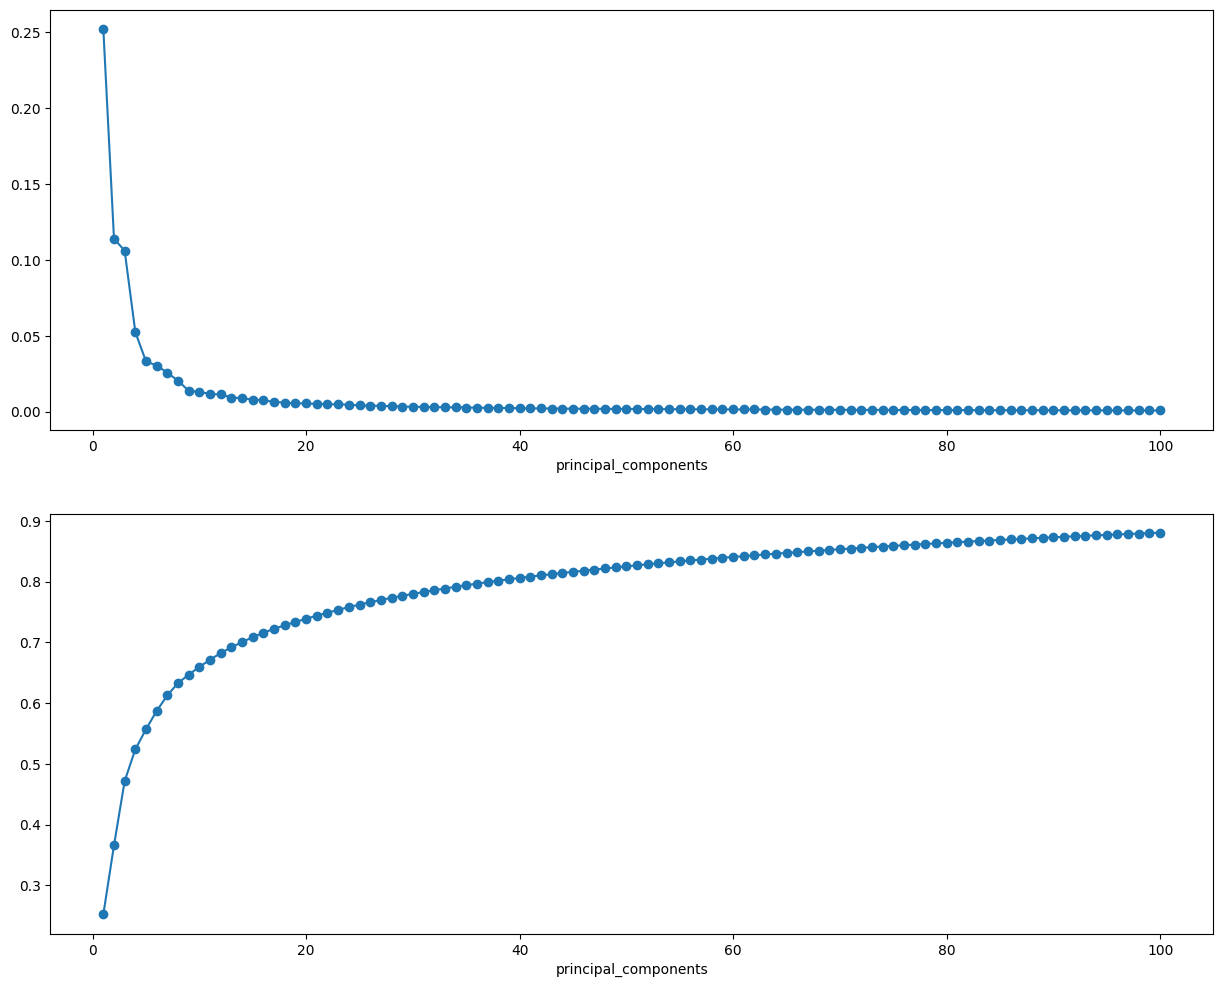

In [15]:
# Usando método Elbow para definir a quantidade de componentes
fig, ax = plt.subplots(nrows=2, figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line', marker='o', ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line', marker='o', ax=ax[1])

In [17]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_transformed)

In [18]:
pca_data.shape

(4318, 50)

## Salvado os novos dados transformados

Salvando o modelo criado com PCA de 50 componentes.

In [19]:
y = data['gender'].values 
np.savez('./data/data_pc_transformed', pca_data, y)

In [20]:
pca_dict = {'pca':pca_50, 'mean_face':mean_face}

In [21]:
pickle.dump(pca_dict, open('model/pca_dict.pickle', 'wb'))

## Visualização das Imagens com Elgen Face

In [22]:
# Invertendo as transformações
pca_data_inv = pca_50.inverse_transform(pca_data)

eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

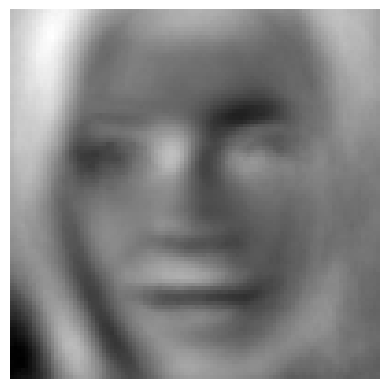

In [23]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

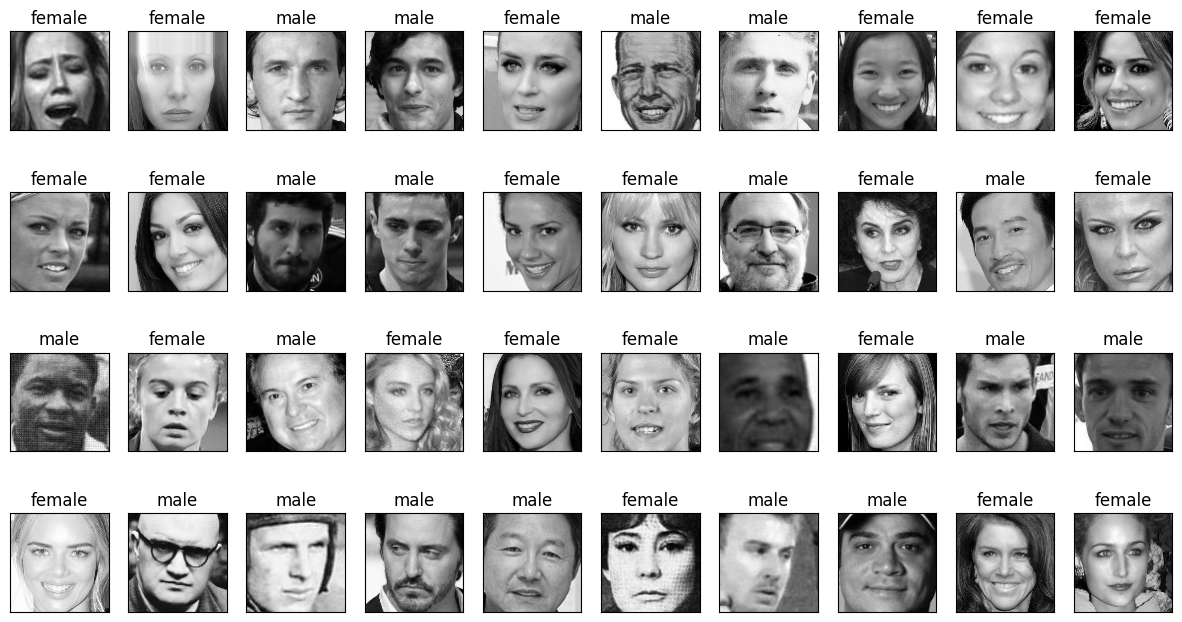

------------------------------Eigen Images------------------------------


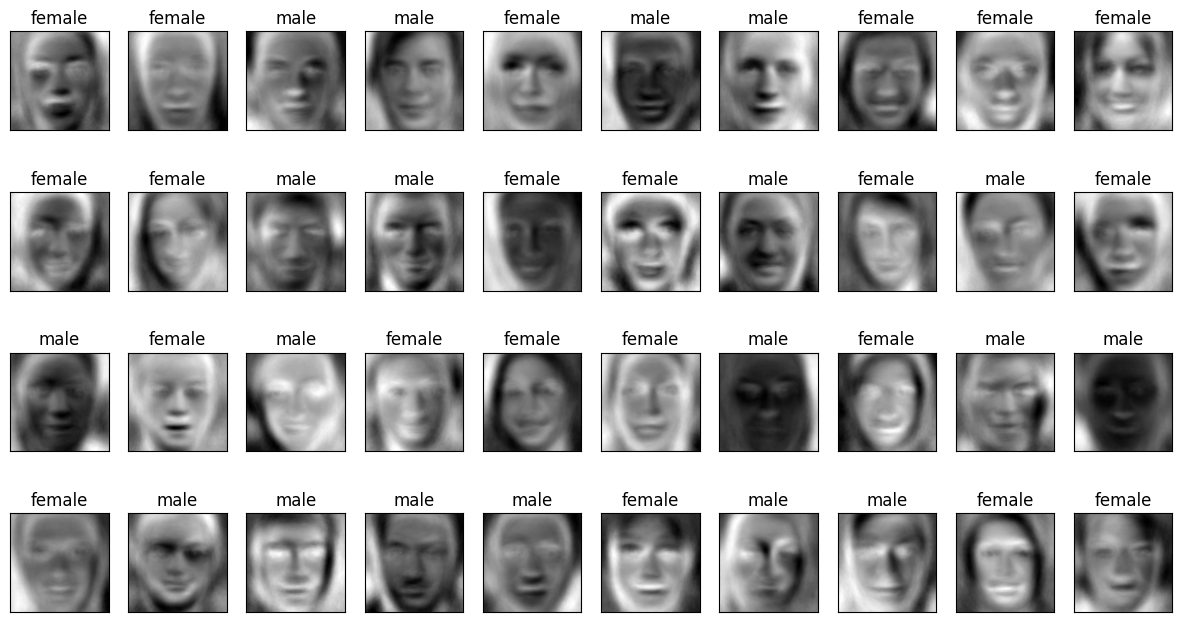

In [26]:
# Visualizando TODAS

np.random.seed(1002)
pics = np.random.randint(0,4319,40)

plt.figure(figsize=(15,8))
for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("-"*30+'Eigen Images'+"-"*30)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()